<h2>НОД - Вариант 1</h2>

In [1]:
x =.
f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1
g = x^5 - x^4 - x^3 + x^2 + 5*x - 5

2      3    4
1 - 5 x + 7 x  - 4 x  + x
            2    3    4    5
-5 + 5 x + x  - x  - x  + x

__НОД, полученный встроенным методом PolynomialExtendedGCD:__

2       3                  2
          79 + 41 x - 8 x  - 21 x   40 - 55 x + 21 x
{-1 + x, {------------------------, -----------------}}
                    121                    121
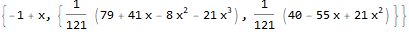

In [4]:
PEGCD = PolynomialExtendedGCD[f, g, x]

-1 + x
               2       3
79 + 41 x - 8 x  - 21 x
------------------------
          121
                2
40 - 55 x + 21 x
-----------------
       121
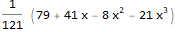
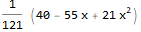

In [5]:
nodStd = Simplify[PEGCD[[1]]]
uStd = Simplify[PEGCD[[2, 1]]]
vStd = Simplify[PEGCD[[2, 2]]]

In [8]:
Simplify[uStd * f + vStd * g] === nodStd

True

__НОД, полученный расширенным алгоритмом Евклида:__

In [58]:
x =.
ExtendedGcd[aa_, bb_] := Module[ {a = aa, b=bb, d, x1, y1, r}, 
        If[SameQ[a, 0],
            {r = {b, 0, 1}},
            {
                {d, x1, y1} = ExtendedGcd[PolynomialRemainder[b, a, x], a];
                r = {Simplify[d], 
                        Simplify[y1 - (PolynomialQuotient[b, a, x]) * x1], 
                        Simplify[x1]
                    };
            }
        
        ];
        r
];

2       3                       2
 1936 (-1 + x)  -16 (-79 - 41 x + 8 x  + 21 x )  16 (40 - 55 x + 21 x )
{-------------, -------------------------------, ----------------------}
      441                     441                         441
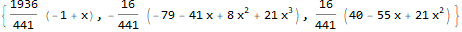

In [60]:
MBP = ExtendedGcd[f, g]

1936 (-1 + x)
-------------
     441
                     2       3
-16 (-79 - 41 x + 8 x  + 21 x )
-------------------------------
              441
                    2
16 (40 - 55 x + 21 x )
----------------------
         441
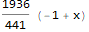
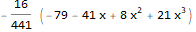
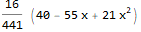

In [61]:
nodMy = MBP[[1]]
uMy = MBP[[2]]
vMy = MBP[[3]]

In [64]:
Simplify[uMy * f + vMy * g] === nodMy

True

__Результаты отличаются на константу__

In [65]:
lastCoef[poly_, x_] := Coefficient[
            poly
            , x
            , Exponent[poly, x]
]

In [66]:
nodStd / lastCoef[nodStd, x] === nodMy / lastCoef[nodMy, x]

True

1936
----
441
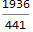

In [67]:
lastCoef[nodMy, x] / lastCoef[nodStd, x]